In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('12-health_risk_classification.csv')

In [4]:
# Data's scaled

In [5]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [7]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


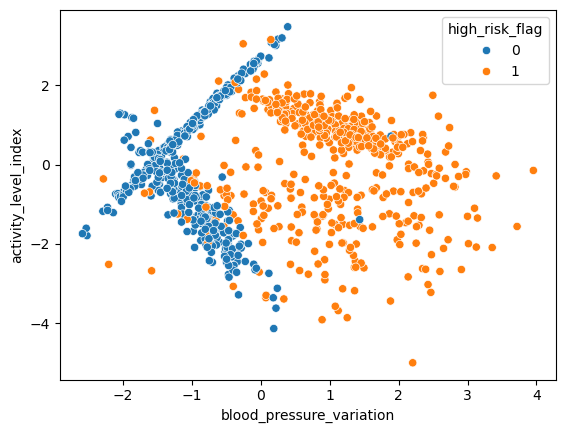

In [8]:
sns.scatterplot(x=df['blood_pressure_variation'],y=df['activity_level_index'],hue=df['high_risk_flag'])
plt.show()

In [9]:
df['high_risk_flag'].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [10]:
X = df.drop('high_risk_flag',axis=1)
y = df['high_risk_flag']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

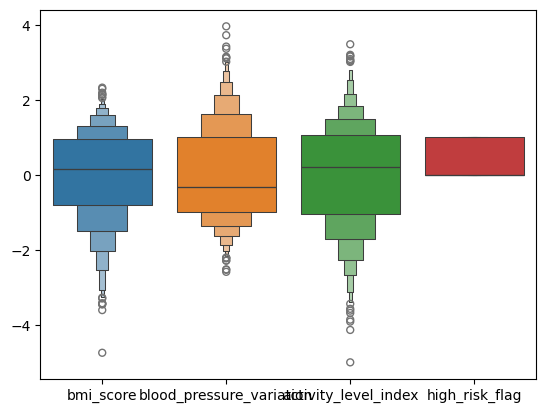

In [14]:
sns.boxenplot(df)
plt.show()

In [16]:
# data is scaled but let me do again

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm="auto",weights="uniform")

In [37]:
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(X_test_scaled)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [40]:
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("accuracy score: \n", accuracy_score(y_test,y_pred))
print("classification_report: \n", classification_report(y_test,y_pred))

Confusion matrix: 
 [[124   2]
 [ 10 114]]
accuracy score: 
 0.952
classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [41]:
classifier2 = KNeighborsClassifier(n_neighbors=5,algorithm="brute",weights="uniform")
classifier2.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='brute')

In [42]:
y_pred2 = classifier.predict(X_test_scaled)
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred2))
print("accuracy score: \n", accuracy_score(y_test,y_pred2))
print("classification_report: \n", classification_report(y_test,y_pred2))

Confusion matrix: 
 [[124   2]
 [ 10 114]]
accuracy score: 
 0.952
classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

